In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Part A: Read The Data

In [2]:
# Load datasets
train_df = pd.read_csv('../playground-series-s4e2/train.csv')
test_df = pd.read_csv('../playground-series-s4e2/test.csv')
sample_submission = pd.read_csv('../playground-series-s4e2/sample_submission.csv')

# Display heads of the datasets
print("Train Data:")
train_df.head()

Train Data:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
print("Test Data:")
test_df.head()

Test Data:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [4]:
print("Sample Submission:")
sample_submission.head()

Sample Submission:


,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


# Part B: Standardize Numerical Features

In [7]:
# List numerical columns to scale
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])

# Part C: Encode Categorical Features

In [8]:
# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on the 'NObeyesdad' column to ensure consistent encoding
label_encoder.fit(train_df['NObeyesdad'])

# Encode binary categorical columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    train_df[col] = LabelEncoder().fit_transform(train_df[col])

# One-hot encode multi-class categorical columns
train_df = pd.get_dummies(train_df, columns=['CAEC', 'CALC', 'MTRANS'], drop_first=True)
train_df['NObeyesdad'] = LabelEncoder().fit_transform(train_df['NObeyesdad'])

# Part D: Split Data into Features and Target

In [9]:
X = train_df.drop(['id', 'NObeyesdad'], axis=1)  # Drop 'id' as it's not informative
y = train_df['NObeyesdad']

print(f"Feature matrix (X) shape: {X.shape}")
print(f"Label vector (y) shape: {y.shape}")

Feature matrix (X) shape: (20758, 22)
Label vector (y) shape: (20758,)


In [10]:
X_train, X_val, y_train, y_val = tts(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing sets
print(f"Training set size: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set size: X_test = {X_val.shape}, y_test = {y_val.shape}")

Training set size: X_train = (14530, 22), y_train = (14530,)
Testing set size: X_test = (6228, 22), y_test = (6228,)


# Part E: Train Multinomial Logistic Regression Model

Accuracy: 0.8625561978163134
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.93      0.90       755
      Normal_Weight       0.85      0.80      0.82       907
     Obesity_Type_I       0.82      0.82      0.82       858
    Obesity_Type_II       0.94      0.97      0.96      1005
   Obesity_Type_III       0.99      1.00      1.00      1207
 Overweight_Level_I       0.73      0.73      0.73       733
Overweight_Level_II       0.72      0.68      0.70       763

           accuracy                           0.86      6228
          macro avg       0.85      0.85      0.85      6228
       weighted avg       0.86      0.86      0.86      6228



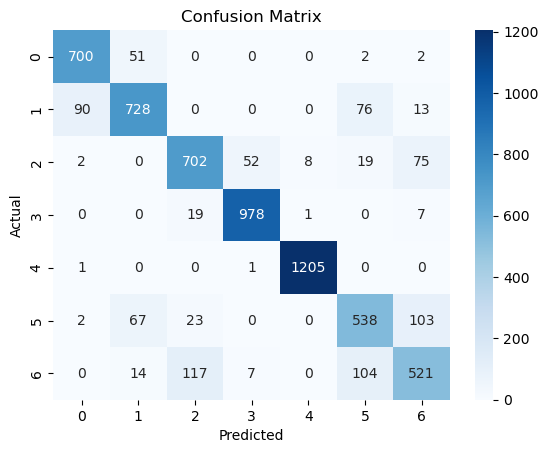

In [11]:
# Initialize logistic regression for multi-class classification
# Train logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# Validate on validation set
y_val_pred = log_reg.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy}")

# Assuming you have used LabelEncoder to encode 'NObeyesdad' earlier
# Inverse transform the predicted and actual labels back to the original class names
y_val_pred_classes = label_encoder.inverse_transform(y_val_pred)  # Predicted values
y_val_classes = label_encoder.inverse_transform(y_val)  # Actual values

# Classification report with original class labels
print("Classification Report:")
print(classification_report(y_val_classes, y_val_pred_classes))

# Confusion Matrix (Optional)
conf_matrix = confusion_matrix(y_val_classes, y_val_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Part F: Cross Validation

In [12]:
# Perform 10-fold cross-validation and evaluate accuracy
cv_scores = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy')

# Display results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy Scores: [0.84874759 0.85982659 0.86897881 0.85549133 0.8588632  0.86319846
 0.86464355 0.87235067 0.86313253 0.8713253 ]
Mean Accuracy: 0.86


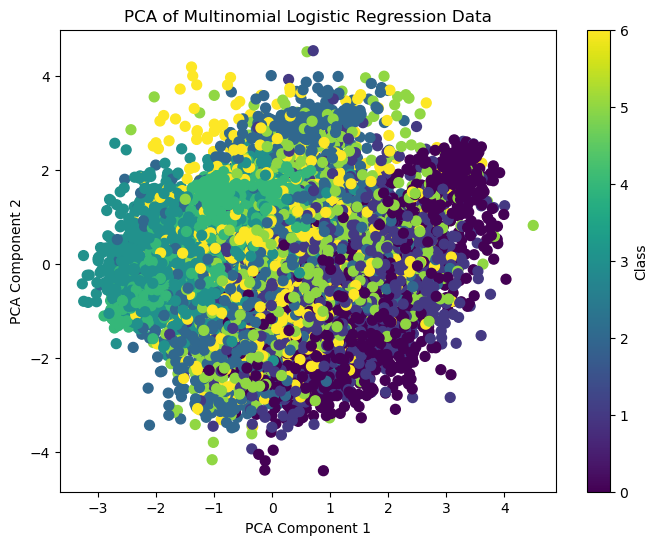

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to reduce the features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)  # X_train is your feature set

# Plot the 2D projection of your data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', s=50)
plt.title('PCA of Multinomial Logistic Regression Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Class')
plt.show()


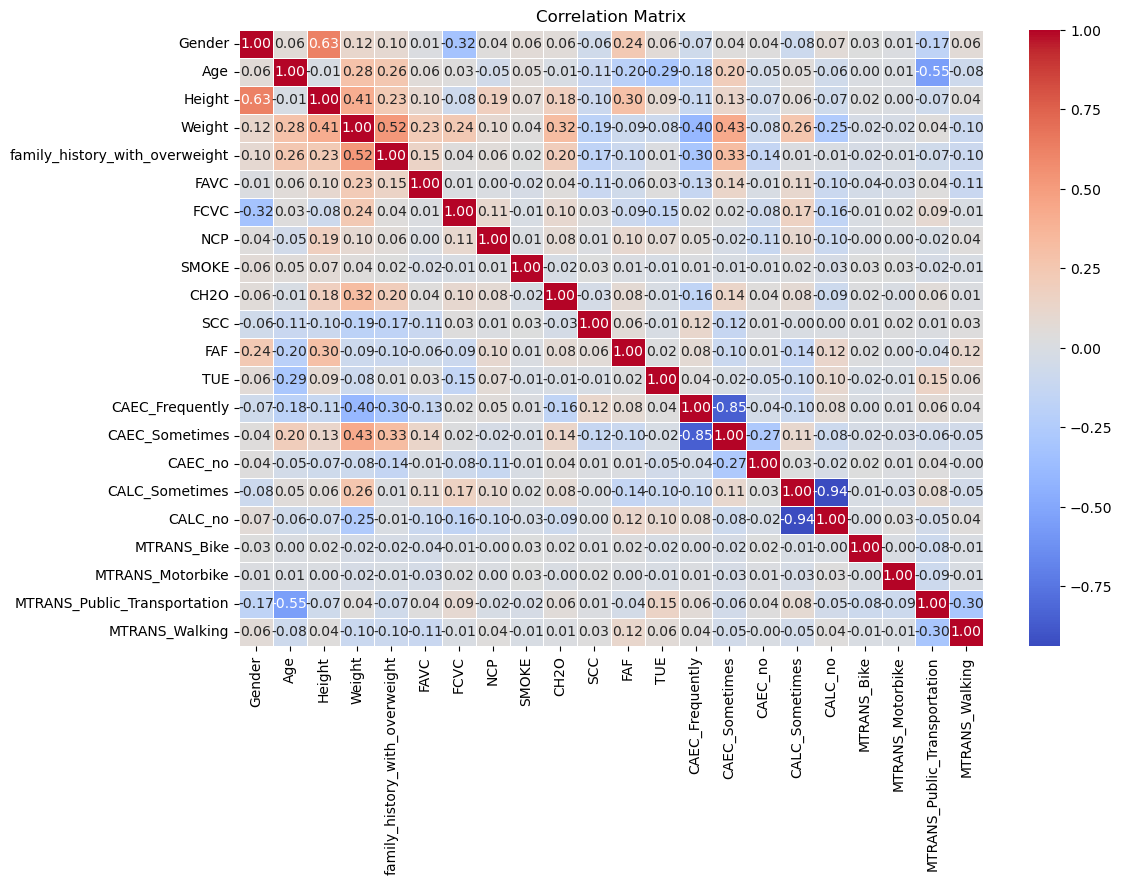

In [69]:
# Compute correlation matrix
corr = X_train.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [70]:
# Fit the model using all features
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# Get the absolute value of the coefficients
coefficients = np.abs(log_reg.coef_)

# Sum the coefficients for each feature (across all classes, if multi-class)
feature_importance = coefficients.sum(axis=0)

# Get the features sorted by importance
feature_names = X_train.columns
sorted_feature_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_feature_indices]

# Show the top 2 most important features
top_2_features = sorted_feature_names[:2]
print("Top 2 features:", top_2_features)


Top 2 features: Index(['Weight', 'Gender'], dtype='object')
